In [1]:
# add required package
install.packages("latex2exp")

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)



In [ ]:
# attach LaTeX Package
library(latex2exp)

# declare the testing power
alpha = 0.05  # change this to change the plot at the end!

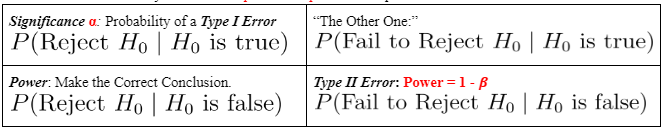

In [21]:
#------------------------------- 1: Set up Plot Parameters ----------------------------------
# -------------------- If you're familiar with ggplot this will seem weird -----------------

par(
  #single plot
  mfrow = c(1, 1),
  #background colour
  bg = "grey95",
  #character expansion of titles by 20%
  cex.main = 1.2,
  #character expansion of labels by 10%
  cex.lab = 1.1,
  #change title colours
  col.main = "black",
  #font family is "serif"
  family = "serif",
  # i means 'internal' x-axis
  xaxs = "i",
  # axis colour
  col.axis = "grey45",
  # foreground colour 
  fg = "grey40",
  fig=c(4,7,6,10)/10
)


In [11]:
#------------------------------- 2: Finding Power and Beta -------------------------------------------

# Let's create some theoretical Normal Characteristics.
sigma = 15 # Theoretical population s.d. of this distribution
mu_O = 100 # Null Distribution Mean 
mu_A = 130 # Alternative Mean : Note in Standard Hypothesis testing we apply a range of means.
           # Think of mu_A as the "true" population mean that is unknown when we do our test.

# Find the Critical Value (assuming standard Z-Test for Means)
critical = qnorm((1-alpha), mu_O, sigma) # Right-tailed test helps visualization

# Calculate the Power of the Test under these parmeters.
# Power = P(Reject Null | Null is False) = P(Reject Null | mu = mu_A)
power = pnorm(q = critical, mu_A, sigma, lower.tail = FALSE)

# Determine the probability of a Type II error under these parameters.
# Beta = P(Fail to Reject Null | Null is False) = 1 - Power
beta = 1 - power

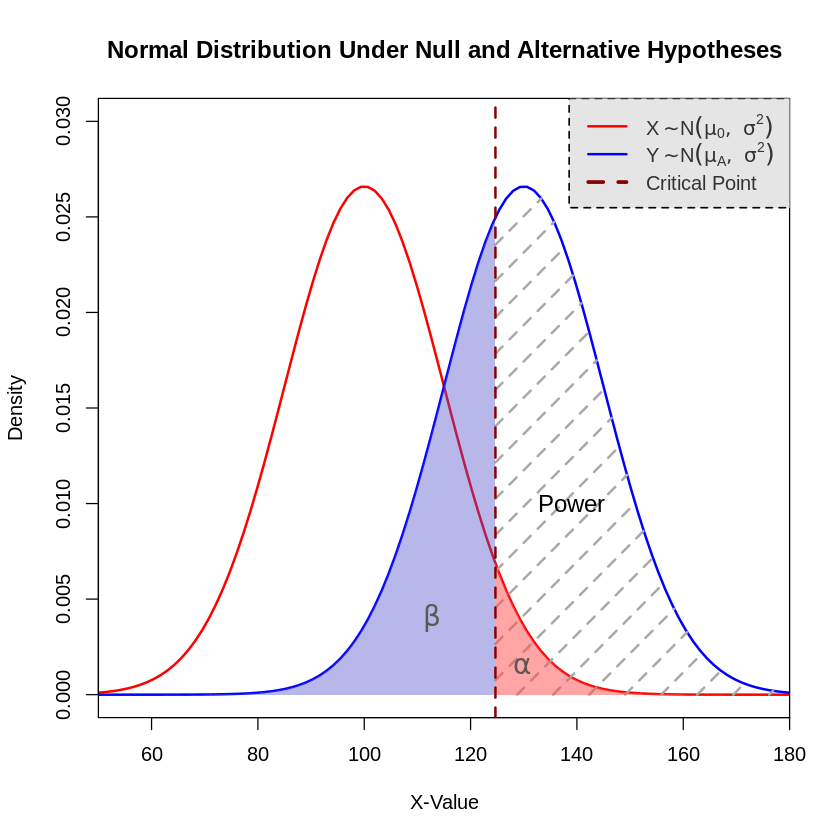

In [26]:
#--------------------------------- 3: Visualize the Results -------------------------------------------

# define x-limit manually from mu
x_limit = c(50, 180)
# 100 values between 50 and the critical point 
left = seq(x_limit[1], critical, length.out = 100) 
# 100 values from critical to top limit (180)
right = seq(critical, x_limit[2], length.out = 100) 

# Calculate Densities for each Subsection
y_HO_right = dnorm(right, mu_O, sigma) #density curve starting from right section
y_HA_left = dnorm(left, mu_A, sigma)   # see above, but for HA and it's mean
y_HA_right = dnorm(right, mu_A, sigma) #see above, but right instead of left

# Distribution of The Null Mean 
curve(dnorm(x, mu_O, sigma), #normal density with Null mean
      xlim = x_limit, 
      lwd = 2, col = "red", 
      xlab = "X-Value", ylab = "Density",
      main = "Normal Distribution Under Null and Alternative Hypotheses",
      ylim = c(0, 0.03), xaxs = "i")

# Distribution of the Alternative/True Mean
curve(dnorm(x, mu_A, sigma), #normal density with Alternative mean.
      xlim = x_limit, col = 'blue', lwd = 2,
      ylim = c(0, 0.03), add = TRUE)

# Shaded Polygon for Power
polygon(c(right, rev(right)), 
        c(y_HA_right, numeric(length(right))), 
        border = NA, density = 5,  
        lty = 2, lwd = 2, angle = 45, col = "darkgray")

# Corresponding Label 
text(critical + 8,  0.01,  adj = 0, label = "Power", cex = 1.2)

#Filled-in Areas

#Alpha: area to the right of the critical point in Null Distribution
polygon(c(right, rev(right)), #mess around with 'right', glue it to itself flipped
        c(y_HO_right, numeric(length(right))), #then set y to be  the distribution, but also a series of 0s n in size
        border = NA, #remove border (dist. already has it)
        col=rgb(1, 0.3, 0.3, 0.5) #set nice transparent red
        )

#Beta: area to the left of the critical point in the Alternative Distribution
polygon(c(left, rev(left)), #mess around with 'right', glue it to itself flipped
        c(y_HA_left, numeric(length(left))), #then set y to be  the distribution, but also a series of 0s n in size
        border = NA, #remove border (dist. already has it)
        col=rgb(0.3, 0.3, 0.8, 0.4) #set nice transparent red
)

#Labels for Alpha and Beta
text(x = (critical + 5),  0.0015, TeX('$\\alpha$'), col = 'grey35', cex = 1.4)
text(x = (critical - 12), 0.004,  TeX('$\\beta$'), col = 'grey35', cex = 1.4)


#Line for the critical point
abline(v = critical, lwd = 2, col = 'darkred', lty = 'dashed')

#write TeX equations for our 2 Distributions
tex_titles = c(TeX('$X \\sim N(\\mu_0, \\, \\sigma^2)\\;$'), 
                TeX('$Y \\sim N(\\mu_A, \\, \\sigma^2)\\;\\;$'))

#Create a Legend with this and the other stuff
legend("topright",
       legend = c(tex_titles, "Critical Point"), #legend is our column names and avg.
       col = c('red', 'blue', 'darkred'), #alternating colours
       lty = c(rep(1, 2), 2), #1 for straight lines, 2 for dashed
       lwd = c(rep(2, 2), 3), #setting parameters
       bg = 'grey90',
       box.col = 'black', #box parameters
       box.lwd = 1.3,
       box.lty = 'dashed',
       text.col = "grey20",
       text.font = 2,
       horiz = F ,
       inset = c(-0.05, 0.00)
)